# Project 2: Fashion MNIST with Keras

In this project we'll be using the fashion MNIST dataset with Keras machine learning tools. 

Fashion MNIST is very similar to the MNIST dataset from project 1. It is a dataset of 70,000, 28x28 images containing 10 different labels. This dataset is all clothing.

I'm downloading the dataset from [here](https://www.kaggle.com/zalando-research/fashionmnist) and unzipping the contents into a directory within the project: `./fashion-data`.

I'm keeping our dataset close to static so that we can really focus in on our new machine learning tool: Keras. Keras is a library that is used in building neural networks. Keras is capable of running on top of TensorFlow, Theano, or CNTK. We're going to be using it with TensorFlow. Note that we'll also be installing extra libraries for gpu support and model saving.

If [your GPU](https://developer.nvidia.com/cuda-gpus) can't handle CUDA drivers, you can just install the normal tensorflow and leave out the CUDA install.

First we're going to need to install the base [CUDA drivers](https://developer.nvidia.com/cuda-90-download-archive) followed by the [neural network drivers](https://developer.nvidia.com/cudnn)

The base CUDA install is a simple download and double click. 

**Important side note:** I've already tested and ensured that I can still play games with these drivers. 

The neural network driver requires signing up for an Nvidia account before downloading the drivers.

Once the neural net libraries are downloaded, you'll have to unzip the folder and place the contents of each subfolder within the associated subfolder at `C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v9.0`. For example, `\cuda\bin\cudnn64_7.dll` should be moved to `C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v9.0\bin\cudnn64_7.dll`

[Time to install Keras and friends:](https://keras.io/)

If you want to run the install command directly out of this notebook: Uncomment the lines that start with a '!' and run the below cell. I'm assuming you're using Anaconda. You can just switch 'conda' to 'pip' if you're not.

In [ ]:
# Install tensorflow with gpu support
#!conda install tensorflow-gpu

# Alternative install without gpu:
#!conda install tensorflow

# Package that lets you save models to disk [OPTIONAL]
#!conda install h5py

# Install Keras
#!conda install keras

# Neural Networks

This video series from [3Blue1Brown](https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi) is a really good, shortish, intro to neural networks.

If you're a fan of lesser explanations, here you go:

Side note: This is going to make a lot more sense if you [Google image search "neural network"](http://www.letmegooglethat.com/?q=neural+network&l=1).

A neural network consists of an input layer, one or more hidden layers of neurons, and an output layer. The input layer is essentially a row from your data. Each node in the layer represents a piece of data from one of the columns in the row.

Each node in the input layer is connected to every node in the first hidden layer (not true all of the time...but let's just say it is for now). The connections between the input and the hidden layer have weights. If enough of the inputs strongly correlate to a node in the hidden layer (have highly weighted connections), that node in the hidden layer "lights up".

If there is a second hidden layer, all of the weighted connections between the lighted nodes in the first layer and second layer trigger. If enough lit incoming connections come into a node on the second layer, it "lights up". 

This continues until the output layer is reached.

# It's Called Fashion

Before diving into out training, let's take a look at our data. This will largely be a repeat of our first notebook, but it's always worth at least confirming that we understand the basics of our data.

In [1]:
# Pandas, our friendly data analysis python library.
import pandas as pd

# Load the data from our CSV
training = pd.read_csv('fashion-data/fashion-mnist_train.csv')
test = pd.read_csv('fashion-data/fashion-mnist_test.csv')

# Let's see our first row:
print(training.head(1))
print(test.head(1))

# And confirm the shape of our data.
print(f'training: {training.shape}')
print(f'test: {test.shape}')

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   

   pixel9    ...     pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0    ...            0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0         0  

[1 rows x 785 columns]
   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      0       0       0       0       0       0       0       0       9   

   pixel9    ...     pixel775  pixel776  pixel777  pixel778  pixel779  \
0       8    ...          103        87        56         0         0   

   pixel780  pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0         0  

[1 rows x 785 columns]
training: (60000, 785)
test: (10000, 785)


### Labels

We can see that our labels are just numbers...here's what those labels represent:

- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot

Adding these to a dict for prettier printing.

In [2]:
label_dict = {
    0:"T-shirt/top",
    1:"Trouser",
    2:"Pullover",
    3:"Dress",
    4:"Coat",
    5:"Sandal",
    6:"Shirt",
    7:"Sneaker",
    8:"Bag",
    9:"Ankle boot"
}

Now, remember how we need to split our labels from our data?

In [3]:
# Make a new dataframe using only the labels
training_labels = training.label
# Make a new dataframe, but just drop the labels column
# 'axis=1' means drop the column heading too.
training_features = training.drop('label', axis=1)
test_labels = test.label
test_features = test.drop('label', axis=1)

# Let's confirm we get the right shapes.
# We should expect a single column for the labels and 784 for the data.
print(f'training_labels: {training_labels.shape}')
print(f'training_features: {training_features.shape}')
print(f'test_labels: {test_labels.shape}')
print(f'test_features: {test_features.shape}')

training_labels: (60000,)
training_features: (60000, 784)
test_labels: (10000,)
test_features: (10000, 784)


Now let's print some pictures.

I'm going to repurpose the print_prediction function from last notebook.

Index: 5004
Label_Number: 9
Label: Ankle boot


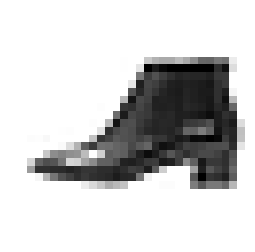

In [4]:
%matplotlib inline
# This library is for creating 2D graphs in python.
import matplotlib
import matplotlib.pyplot as plt

def print_picture(index, test_features, test_labels):

    # iloc is a pandas method that allows to access dataframe rows by index number
    our_clothing = test_features.iloc[index]

    # Reshape our data. We need to reshape our 1X784 array into 28x28.
    our_clothing_shaped_for_graphing = our_clothing.values.reshape(28, 28)

    print(f'Index: {index}')
    label_num = test_labels.iloc[index]
    print(f'Label_Number: {label_num}')
    print(f'Label: {label_dict[label_num]}')
    # cmap=matplotlib.cm.binary: "Make bigger numbers darker"
    plt.imshow(our_clothing_shaped_for_graphing, cmap=matplotlib.cm.binary)
    plt.axis("off")
    plt.show()

# Just a quick test
index = 5004
print_picture(index, test_features, test_labels)

# Let's make a neural net

For our first neural net I'm going to be sticking as close as possible to the example from the [Keras docs](https://keras.io/getting-started/sequential-model-guide/). We'll try our best to beef it up later.

### Terms and Conditions may apply

We need to define some terms before digging into the code. In order of appearance:

- **Sequential:** Refers to the fact that our neural network will be making disicions in a one-way manner from the input layer to the output layer. This is the most basic type of neural net and Keras provides a stock Sequential class for us to fill in.

- **Dense:** Refers to the fact that every node is fully connected to all of the nodes in the next layer.

- **Activation:** Remember when we talked about how enough incoming connections activating resulted in a node "lighting up"? Well we need an equation that determines the 'lit' vs 'not lit' state. We call this the activation function.

    - **RELU:** You're typically going to see either Sigmoid or RELU activation function. All you really need to know for now is that RELU is faster and more performant.
        - Ok that's all you **need** to know, but fun fact: The neurons in your brain use a Sigmoid activation function, which is why Sigmoid was exclusively used for a long time.
    - **Softmax:** Softmax refers to how we actually predict the class of whatever we're trying to classify. Softmax outputs a probabiliy for each class, and all of the probabilities add up to 1.
    
- **Optimizer:** The neural network figures out the weights of the connections in the network by running an optimizer. Let's say we're just starting to train a network. All of the weights on the connections start off randomized. We have a picture of a sandal. The picture is fed into our network and our network makes a guess. Whether it guesses right or wrong, the results of our training result in a **back propagation** of this information that slightly tweaks the weights in our network to either favor or discourage the guess we just made. The optimizer is the equation we choose to do this tweaking for us.

- **Loss:** A measure of how bad our model is. More specifically, a measure of how far a model's predictions are from its label. We have to define an method for determining loss.

- **Accuracy:** The fraction of predictions our model got right.

- **One Hot Encoding:** Converts a single column with multiple possible values to multiple columns with either a 0 or 1 value. In our case, we'll be splitting our single label with value 0-9 into 10 columns. '9' is an ankle boot. So an ankle boot will have all '0's with a '1' in the 9 column. This is how you split your output layer into distinct classes. Note that this is also often used as a preprocessing technique on input data.

- **Epoch:** An epoch is a single, full pass over all of the traning data.

- **Batch Size:** The set of examples used in one iteration (one back propigation cycle, or gradient update) of model training.


In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
# Each of the following creates a layer in our neural network.
# This creates a 32 node layer and 784 incoming connections from the input layer.
model.add(Dense(32, activation='relu', input_dim=784))
# The next layer is our output layer.
# It has 10 nodes (1 for each output category) and uses softmax activation.
model.add(Dense(10, activation='softmax'))
# ".compile" Configures the model for training. See definitions above.
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Create our 10 separate otuput classes our of the traning labels.
one_hot_labels = keras.utils.to_categorical(training_labels, num_classes=10)

# This actually trains the model.
model.fit(training_features, one_hot_labels, epochs=10, batch_size=32)

C:\Users\seanm\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Epoch 1/10
60000/60000 [==============================] - 5s 89us/step - loss: 12.9254 - acc: 0.1979
Epoch 2/10
60000/60000 [==============================] - 4s 64us/step - loss: 12.9005 - acc: 0.1996
Epoch 3/10
60000/60000 [==============================] - 4s 63us/step - loss: 12.9009 - acc: 0.1996
Epoch 4/10
60000/60000 [==============================] - 4s 63us/step - loss: 12.8988 - acc: 0.1997
Epoch 5/10
60000/60000 [==============================] - 4s 62us/step - loss: 12.8988 - acc: 0.1997
Epoch 6/10
60000/60000 [==============================] - 4s 63us/step - loss: 12.8988 - acc: 0.1997
Epoch 7/10
60000/60000 [==============================] - 4s 62us/step - loss: 12.8988 - acc: 0.1997
Epoch 8/10
60000/60000 [==============================] - 4s 63us/step - loss: 12.8988 - acc: 0.1997
Epoch 9/10
60000/60000 [==============================] - 4s 62us/step - loss: 12.8988 - acc: 0.1997
Epoch 10/10
60000/60000 [==============================] - 4s 62us/step - loss: 12.8988 - a

### Results

I'm not sure about the loss. We obviously want the number to go down, but we don't really have an idea of its relative 'goodness' for now.

Our accuracy is terrible. We're only getting 19.97% correct on the training data.

Let's see how our test data does

In [7]:
# One hot encode the testing data
one_hot_test_labels = keras.utils.to_categorical(test_labels, num_classes=10)
# Evaluate our trained model against the testing feautres and labels.
score = model.evaluate(test_features, one_hot_test_labels, batch_size=128)
print(f'Loss: {score[0]}')
print(f'Accuracy: {score[1]}')

10000/10000 [==============================] - 0s 9us/step
Loss: 12.906602178955078
Accuracy: 0.1992


### Bad

Alright, we obviously aren't doing great with 19.92% accuracy.

|Run Num |Training Loss|Training Accuracy|Testing Loss|Testing Accuracy|
|--------|------------ |-----------------|------------|----------------|
|1       |12.89        |19.97%           |12.9        |19.92%          |

Just to twist the knife, let's see an actual prediction. We're also going to see what one hot encoding looks like. Note that the one hot encoding columns aren't in numerical order.

In [5]:
# argmax is used to convert back from one hot encoding
from numpy import argmax

def print_prediction(model, index, test_features, test_labels, one_hot_test_labels):

    our_clothing = test_features.iloc[index]

    our_clothing_shaped_for_graphing = our_clothing.values.reshape(28, 28)
    our_clothing_shaped_for_prediction = our_clothing.values.reshape(1, -1)

    print(f'Index: {index}')
    label_num = test_labels.iloc[index]
    print(f'Label_Number: {label_num}')
    print(f'Label: {label_dict[label_num]}')
    # Make the prediction, then convert from one hot encode.
    predict_num = argmax(model.predict(our_clothing_shaped_for_prediction)[0])
    print(f'Prediction_Number: {predict_num}')
    print(f'Prediction_Number: {label_dict[predict_num]}')
    plt.imshow(our_clothing_shaped_for_graphing, cmap=matplotlib.cm.binary)
    plt.axis("off")
    plt.show()
    print(f'Raw one hot encoding prediction: {model.predict(our_clothing_shaped_for_prediction)[0]}')

Index: 5004
Label_Number: 9
Label: Ankle boot
Prediction_Number: 5
Prediction_Number: Sandal


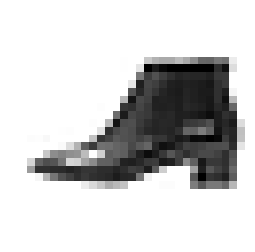

Raw one hot encoding prediction: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [9]:
# Just a quick test
index = 5004
print_prediction(model, index, test_features, test_labels, one_hot_test_labels)

## Round 2

There are likley more refined ways in which we could eke out a more performant neural net, but I'd like to simply take our first model, add more layers, and train it for more epochs.

I'm going to just play with this for awhile and save my best results.

(I'm also going to cut some epochs for readability)

In [9]:
model2 = Sequential()

model2.add(Dense(32, activation='relu', input_dim=784))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(10, activation='softmax'))

# Not changing options here
model2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

one_hot_labels = keras.utils.to_categorical(training_labels, num_classes=10)

model2.fit(training_features, one_hot_labels, epochs=500, batch_size=1000)

Epoch 1/500
60000/60000 [==============================] - 1s 24us/step - loss: 1.4990 - acc: 0.4418
Epoch 100/500
60000/60000 [==============================] - 1s 18us/step - loss: 0.2305 - acc: 0.9141
Epoch 200/500
60000/60000 [==============================] - 1s 18us/step - loss: 0.1807 - acc: 0.9325
Epoch 300/500
60000/60000 [==============================] - 1s 19us/step - loss: 0.1607 - acc: 0.9407
Epoch 400/500
60000/60000 [==============================] - 1s 18us/step - loss: 0.1486 - acc: 0.9460
Epoch 500/500
60000/60000 [==============================] - 1s 18us/step - loss: 0.1482 - acc: 0.9493


### And on the testing data?

10000/10000 [==============================] - 0s 15us/step
Total Testing Loss: 0.5733513751506806
Total Testing Accuracy: 0.8728
Index: 5004
Label_Number: 9
Label: Ankle boot
Prediction_Number: 9
Prediction_Number: Ankle boot


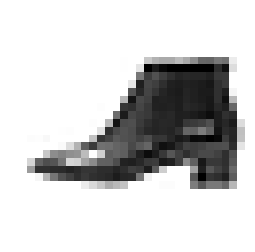

Raw one hot encoding prediction: [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 2.3763036e-32 1.2434615e-38 4.1381787e-11 1.6426548e-25 1.0000000e+00]


In [10]:
score = model2.evaluate(test_features, one_hot_test_labels, batch_size=128)
print(f'Total Testing Loss: {score[0]}')
print(f'Total Testing Accuracy: {score[1]}')
index = 5004
print_prediction(model2, index, test_features, test_labels, one_hot_test_labels)

## Much better

|Run Num |Training Loss|Training Accuracy|Testing Loss|Testing Accuracy|
|--------|------------ |-----------------|------------|----------------|
|1       |12.89        |19.97%           |12.9        |19.92%          |
|2       |0.14         |94.93%           |0.57        |87.28%          |

We clearly did way better with our second model. Our testing accuracy vs our training accuracy indicates clear overfitting, but I'm still overall happy with the results. Plus, we can now identify our boot!

#### Method:
1. I played around with the size of the NN layers. I would see some slight imporvements with higher number (I went up to 784) but the gains were minor at best. The accuracy frequently went to .10 (10% accuracy on 10 classes is just random) and traning times were longer.

2. I found that expanding the number of 32 node layers helped the most. I increased and decreased until finding the best number.

3. I had the same process for epochs and batch. Lowering batch massivley slowed the traning process.

4. [Here's a much more detailed walkthrough of the process](https://xkcd.com/1838/)

#### How do we compare?
While waiting on model2 to train, I looked at the top few kaggle kernels for this dataset. We slightly underperform against the top entries, but I'm suprised how close (and under) some were. Here's their testing accuracy: 

1. [92.72%](https://www.kaggle.com/bugraokcu/cnn-with-keras)
2. [91.76%](https://www.kaggle.com/pavansanagapati/fashion-mnist-cnn-model-with-tensorflow-keras)
3. [76.80%](https://www.kaggle.com/kmader/capsulenet-on-fashion-mnist)

The kaggle examples all use convolutional neural nets, which we'll get to later.

## What if I want to actually use a model some day?

Ok, secrets time: I'm writing this notebook in really small chunks. I just sat down to start writing this section. Why's that matter? Well, if I want to reuse either model I've made so far I have to rerun many of the cells in the notebook (including the really long model trainging parts).

Secret time: It's embarrassingly easy....

In [12]:
# Saves each of the models we've trained.
# Note the 'h5' file extension. This is the optional h5py package we installed earlier. 
model.save('model1.h5')
model2.save('model2.h5')

# Remove the existing models so that we can load them from the file.
del model
del model2

Unfortunately h5 files are binary so I won't be uploading them to github. You'll just have to run the notebook if you want your own! 

### Starting from a saved model

Index: 2000
Label_Number: 8
Label: Bag
Prediction_Number: 8
Prediction_Number: Bag


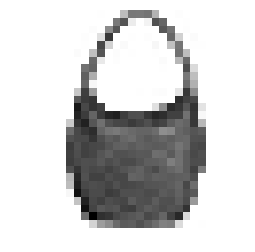

Raw one hot encoding prediction: [2.6439161e-06 6.4139652e-11 2.1910996e-08 6.2880270e-14 2.8220009e-07
 1.8099086e-05 3.9929438e-10 3.2894041e-09 9.9997807e-01 8.5317811e-07]


In [18]:
import keras
from keras.models import load_model

# Reloading our one hot labels
one_hot_test_labels = keras.utils.to_categorical(test_labels, num_classes=10)

# Load our model from our h5 file. 
model = load_model('model2.h5')

print_prediction(model, 2000, test_features, test_labels, one_hot_test_labels)


## Break time

This notebook is getting a little long. See fashion-keras-2.ipynb for our second chapter.